In [2]:
#import all the modules needed
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import signal
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import get_window

In [3]:
t_earthquake = 75
sampling_rate = 500
def setting_up_earthquake (): 
    earthquake_initial = []
    with open("dataset1.csv") as file_name:
        earthquake_initial = np.loadtxt(file_name, delimiter=" ")


    array_t = np.linspace(0, 75, num=len(earthquake_initial))

    return earthquake_initial

In [4]:
# Known Signal = sum of Sine Waves

def generate_sin(A1,w1,A2,w2,A3,w3,t_max):
    t_list_sin = np.linspace(0,t_max,37500)
    sin_sum = A1*np.sin(w1*t_list_sin) + A2*np.sin(w2*t_list_sin) + A3*np.sin(w3*t_list_sin)

    return sin_sum, t_list_sin

In [5]:
def applying_fft(signal_analysed, samples): 
    
    # Number of samples in normalized_tone
    N = int (sampling_rate * t_earthquake)

    yf = fft(signal_analysed)
    xf = fftfreq(N, 1 / sampling_rate)
    return yf, xf

In [6]:
#function to apply the selected window function
def applying_window_function(window_function, signal_analysed, samples, t): 
    y = window_function*signal_analysed
    x = np.linspace(0, t, samples)
    return y,x

In [10]:
def earthquake_data (): 
    #set the no of samples for the windowing function
    hann_input = int(t_earthquake*sampling_rate)
    samples = int(t_earthquake*sampling_rate)
    #get window function
    window = signal.windows.hann(hann_input)
    #perform the fft, windowing and fft_windowing
    initial_signal = setting_up_earthquake()
    x = np.linspace(0, t_earthquake, samples)
    y_fft, x_fft = applying_fft(initial_signal, samples)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #plot for unwindowed response
    fig.suptitle('unwindowed response')
    ax1.plot(x, initial_signal, color ="blue")
    ax1.set_xlabel("time/s")
    ax1.set_ylabel("amplitude/m")
    ax2.plot(x_fft, np.abs(y_fft))
    """ax2.set_xlim([0, 5])
    ax2.set_ylim([0, 0.1]) """
    ax2.set_xlabel("frequency/Hz")
    y_window, x_window =applying_window_function (window, initial_signal, samples, t_earthquake)
    #plot for windowed response
    fig, (ax3, ax4) = plt.subplots(1, 2)
    fig.suptitle('hann windowed response')
    ax3.plot(x_window, y_window, color ="blue")
    ax3.set_xlabel("time/s")
    ax3.set_ylabel("amplitude/m")
    y_windowed_fft, x_windowed_fft = applying_fft(y_window, samples)
    ax4.plot(x_windowed_fft, np.abs(y_windowed_fft))
    """ax4.set_xlim([0, 5])
    ax4.set_ylim([0, 0.1]) """
    ax4.set_xlabel("frequency/Hz")
    plt.show()

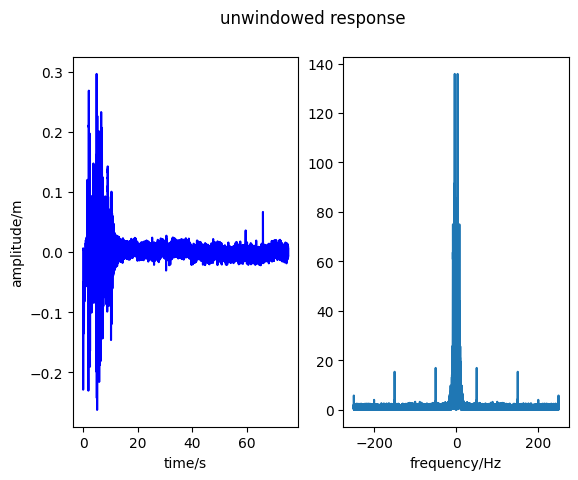

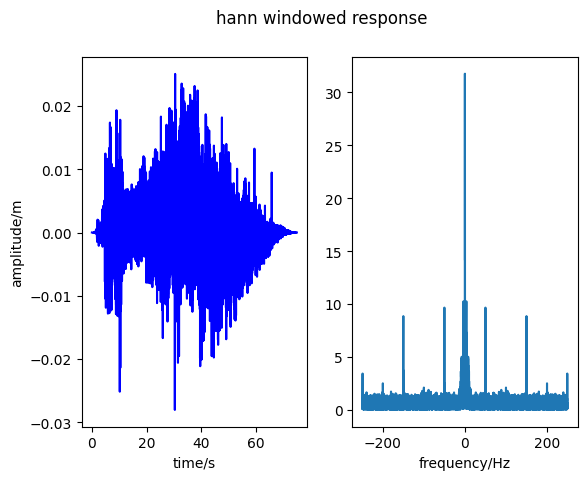

In [11]:
earthquake_data()
